In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("output/output_tasks-100000_workers-4_sleep-0_5.csv", parse_dates=["start", "end"], infer_datetime_format=True)
df = df.set_index("start")[["worker"]]
df = df.groupby("worker").resample("60s").count()
df.columns = ["occurances"]
df

occurances
worker             start                          
SpawnPoolWorker-45 2021-06-23 15:49:00         368
                   2021-06-23 15:50:00         360
                   2021-06-23 15:51:00         383
                   2021-06-23 15:52:00         387
                   2021-06-23 15:53:00         401
...                                            ...
SpawnPoolWorker-48 2021-06-23 16:49:00         397
                   2021-06-23 16:50:00         399
                   2021-06-23 16:51:00         413
                   2021-06-23 16:52:00         383
                   2021-06-23 16:53:00         168

[260 rows x 1 columns]

In [3]:
sum_occurances_df = df.reset_index()
sum_occurances_df = sum_occurances_df.groupby("start")[["occurances"]].sum()
sum_occurances_df.head()

,occurances
start,
2021-06-23 15:49:00,1443
2021-06-23 15:50:00,1501
2021-06-23 15:51:00,1568
2021-06-23 15:52:00,1516
2021-06-23 15:53:00,1561


In [4]:
sum_occurances_df = sum_occurances_df.reset_index()
min_time = sum_occurances_df["start"].min()

In [5]:
sum_occurances_df["start"] = sum_occurances_df["start"].apply(lambda x: int((x - min_time).total_seconds()))
sum_occurances_df = sum_occurances_df.set_index("start")
sum_occurances_df.head()

,occurances
start,
0,1443
60,1501
120,1568
180,1516
240,1561


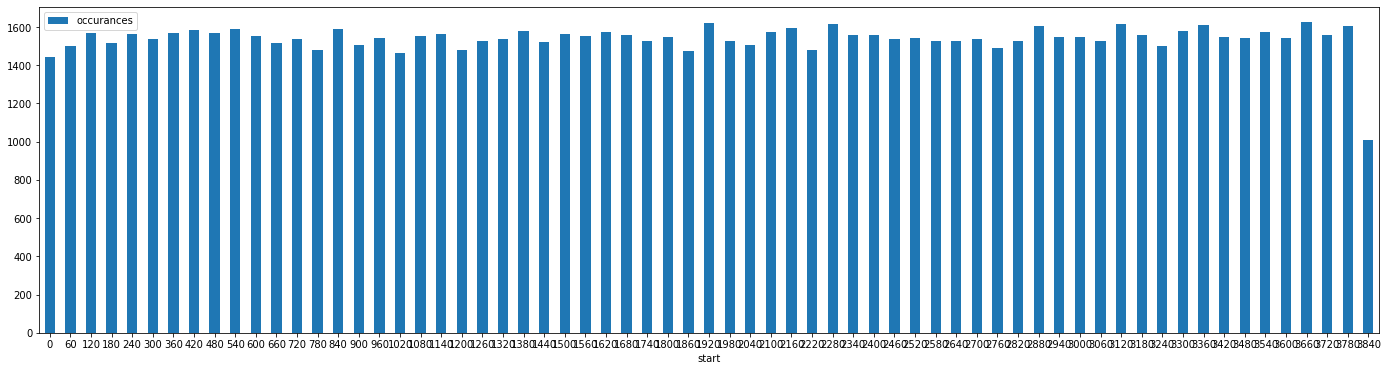

In [6]:
fig, ax = plt.subplots(figsize=(24, 6))
sum_occurances_df.plot(kind="bar", ax=ax, rot=0)

In [7]:
worker_occurances_df = df.reset_index()
worker_occurances_df = worker_occurances_df.groupby(["start", "worker"])[["occurances"]].sum()
worker_occurances_df

occurances
start               worker                        
2021-06-23 15:49:00 SpawnPoolWorker-45         368
                    SpawnPoolWorker-46         347
                    SpawnPoolWorker-47         374
                    SpawnPoolWorker-48         354
2021-06-23 15:50:00 SpawnPoolWorker-45         360
...                                            ...
2021-06-23 16:52:00 SpawnPoolWorker-48         383
2021-06-23 16:53:00 SpawnPoolWorker-45         309
                    SpawnPoolWorker-46         265
                    SpawnPoolWorker-47         264
                    SpawnPoolWorker-48         168

[260 rows x 1 columns]

In [8]:
worker_occurances_df = worker_occurances_df.reset_index()
worker_occurances_df["start"] = worker_occurances_df["start"].apply(lambda x: int((x - min_time).total_seconds()))
worker_occurances_df.head()

,start,worker,occurances
0,0,SpawnPoolWorker-45,368
1,0,SpawnPoolWorker-46,347
2,0,SpawnPoolWorker-47,374
3,0,SpawnPoolWorker-48,354
4,60,SpawnPoolWorker-45,360


In [9]:
# rigin.pivot(index='label', columns='type')['value']

In [10]:
worker_occurances_df = worker_occurances_df.pivot(index="start", columns="worker")
worker_occurances_df.head()

occurances                                        \
worker SpawnPoolWorker-45 SpawnPoolWorker-46 SpawnPoolWorker-47   
start                                                             
0                     368                347                374   
60                    360                396                364   
120                   383                411                391   
180                   387                386                374   
240                   401                372                389   

                           
worker SpawnPoolWorker-48  
start                      
0                     354  
60                    381  
120                   383  
180                   369  
240                   399

Text(0, 0.5, 'Seconds Elapsed')

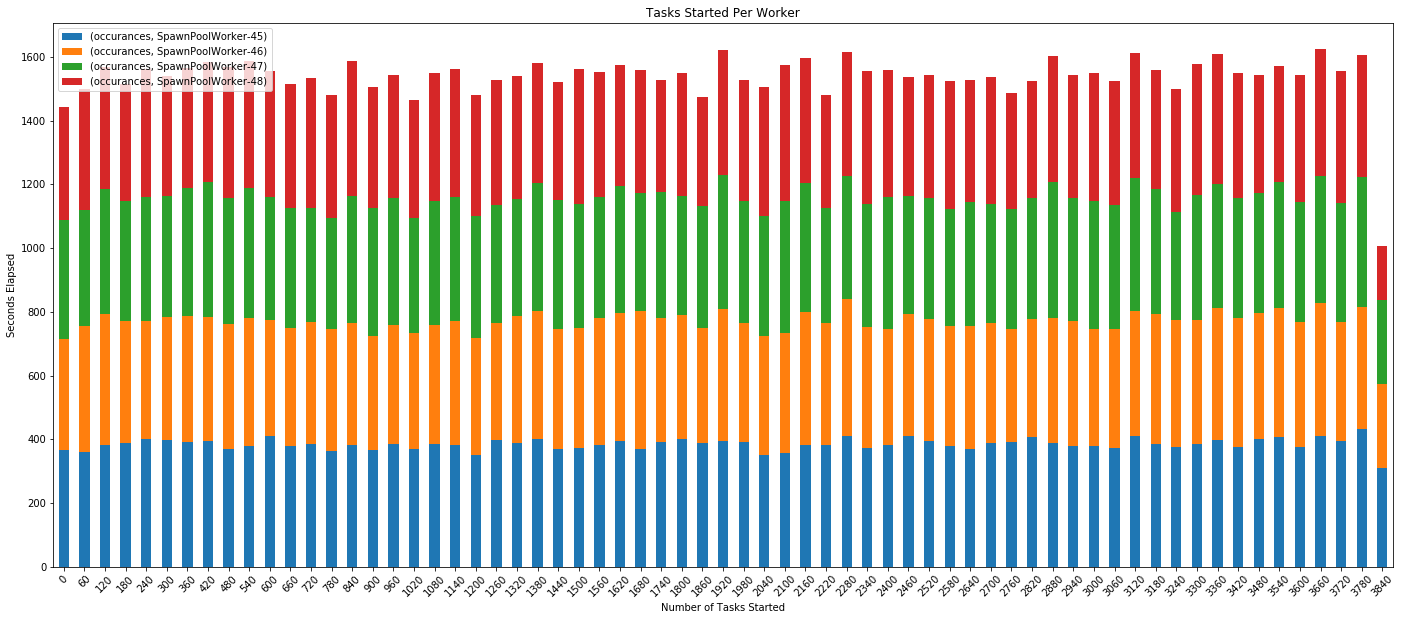

In [11]:
fig, ax = plt.subplots(figsize=(24, 10))
ax = worker_occurances_df.plot(kind="bar", ax=ax, rot=45, stacked=True, title="Tasks Started Per Worker")
ax.legend(loc='upper left')
ax.set_xlabel("Number of Tasks Started")
ax.set_ylabel("Seconds Elapsed")